# Test Merge Cont
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Macro demonstrating the merging of containers.



**Author:** The Root Team  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-mirror/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Thursday, January 19, 2017 at 04:31 PM.</small></i>

In [1]:
TFile *f;

 A helper function is created: 

In [2]:
%%cpp -d
TSeqCollection *GetCollection()
{
   TObject *obj;
#ifndef ClingWorkAroundMissingDynamicScope
# define ClingWorkAroundMissingDynamicScope
#endif
   f = TFile::Open("hsimple.root");
   if( !f ) {
#ifdef ClingWorkAroundMissingDynamicScope
     f = (TFile*)gROOT->ProcessLine("hsimple(1);");
#else
     f = hsimple(1);
#endif
   }
   gROOT->cd();
   TList *l0 = new TList();
   TList *l01 = new TList();
   TH1 *hpx = (TH1*)f->Get("hpx");
   printf("Adding hpx: %d entries\n", (int)hpx->GetEntries());
   l01->Add(hpx);
   TH1 *hpxpy = (TH1*)f->Get("hpxpy");
   l01->Add(hpxpy);
   TH1 *hprof = (TH1*)f->Get("hprof");
   l0->Add(hprof);
   l0->Add(l01);
   return l0;
}

In [3]:
TString tutdir = gROOT->GetTutorialsDir();
gROOT->LoadMacro(tutdir+"/hsimple.C");
TList *list1 = (TList *)GetCollection();
TList *inputs = new TList();
for (Int_t i=0; i<10; i++) {
   inputs->AddAt(GetCollection(),0);
   list1->Merge(inputs);
   inputs->Delete();
   f->Close();
}
delete inputs;
TH1F *hpx = (TH1F*)(((TList*)list1->At(1))->At(0));
printf("============================================\n");
printf("Total  hpx: %d entries\n", (int)hpx->GetEntries());
hpx->Draw();
list1->Delete();
delete list1;

Adding hpx: 25000 entries


Adding hpx: 25000 entries
Adding hpx: 25000 entries
Adding hpx: 25000 entries
Adding hpx: 25000 entries
Adding hpx: 25000 entries
Adding hpx: 25000 entries
Adding hpx: 25000 entries
Adding hpx: 25000 entries
Adding hpx: 25000 entries
Adding hpx: 25000 entries
Total  hpx: 275000 entries


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

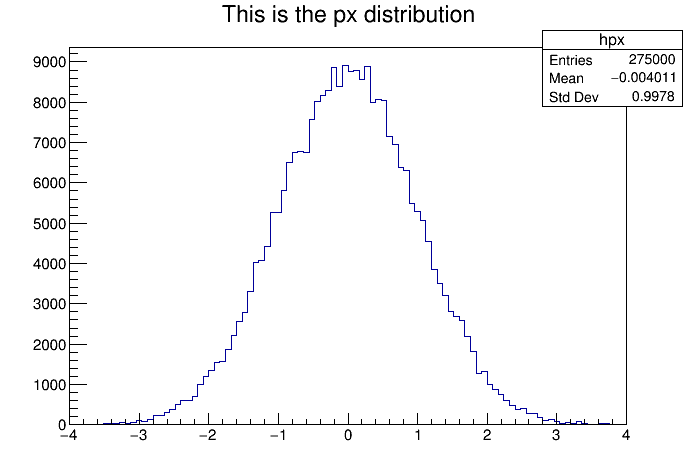

In [4]:
gROOT->GetListOfCanvases()->Draw()